<a href="https://colab.research.google.com/github/sheicky/Brain_Tumor_AI/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading the dataset from kaggle
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:05<00:00, 35.6MB/s]
100% 149M/149M [00:05<00:00, 28.6MB/s]


In [ ]:
# Create a dataframe from the dataset and classifying the datas

def get_class_paths(path) :
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path) :
      for image in os.listdir(label_path) :
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({'class' : classes, 'path' : class_paths})

  return df

In [ ]:
tr_df = get_class_paths("/content/Training")
tr_df.head()

,class,path
0,meningioma,/content/Training/meningioma/Tr-me_1245.jpg
1,meningioma,/content/Training/meningioma/Tr-me_0590.jpg
2,meningioma,/content/Training/meningioma/Tr-me_0153.jpg
3,meningioma,/content/Training/meningioma/Tr-me_0130.jpg
4,meningioma,/content/Training/meningioma/Tr-me_0024.jpg


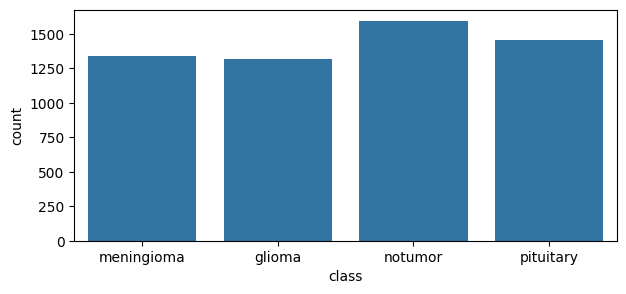

In [ ]:
plt.figure(figsize=(7,3))
ax = sns.countplot(x=tr_df['class'], data=tr_df)

In [ ]:
ts_df = get_class_paths("/content/Testing")
ts_df.head()

,class,path
0,meningioma,/content/Testing/meningioma/Te-me_0208.jpg
1,meningioma,/content/Testing/meningioma/Te-me_0151.jpg
2,meningioma,/content/Testing/meningioma/Te-me_0046.jpg
3,meningioma,/content/Testing/meningioma/Te-me_0112.jpg
4,meningioma,/content/Testing/meningioma/Te-me_0034.jpg


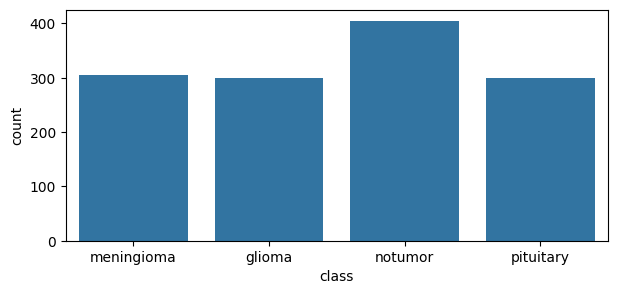

In [ ]:
plt.figure(figsize=(7,3))
ax = sns.countplot(x=ts_df['class'], data=ts_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['class'])


In [ ]:
valid_df

,class,path
263,meningioma,/content/Testing/meningioma/Te-me_0174.jpg
323,glioma,/content/Testing/glioma/Te-gl_0266.jpg
18,meningioma,/content/Testing/meningioma/Te-meTr_0007.jpg
1288,pituitary,/content/Testing/pituitary/Te-pi_0143.jpg
276,meningioma,/content/Testing/meningioma/Te-me_0019.jpg
...,...,...
1305,pituitary,/content/Testing/pituitary/Te-pi_0235.jpg
293,meningioma,/content/Testing/meningioma/Te-me_0246.jpg
919,notumor,/content/Testing/notumor/Te-no_0399.jpg
529,glioma,/content/Testing/glioma/Te-gl_0287.jpg


In [ ]:
ts_df

,class,path
770,notumor,/content/Testing/notumor/Te-no_0340.jpg
55,meningioma,/content/Testing/meningioma/Te-me_0144.jpg
224,meningioma,/content/Testing/meningioma/Te-me_0132.jpg
350,glioma,/content/Testing/glioma/Te-gl_0028.jpg
129,meningioma,/content/Testing/meningioma/Te-me_0239.jpg
...,...,...
294,meningioma,/content/Testing/meningioma/Te-me_0071.jpg
95,meningioma,/content/Testing/meningioma/Te-me_0135.jpg
1303,pituitary,/content/Testing/pituitary/Te-pi_0224.jpg
253,meningioma,/content/Testing/meningioma/Te-me_0191.jpg


# Preprocessing the datas


In [ ]:
batch_size = 32
img_size = (299,299)
image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    dataframe=tr_df,
    x_col = 'path',
    y_col='class',
    batch_size=batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col = 'path',
    y_col='class',
    batch_size=batch_size,
    target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col = 'path',
    y_col='class',
    batch_size=batch_size,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


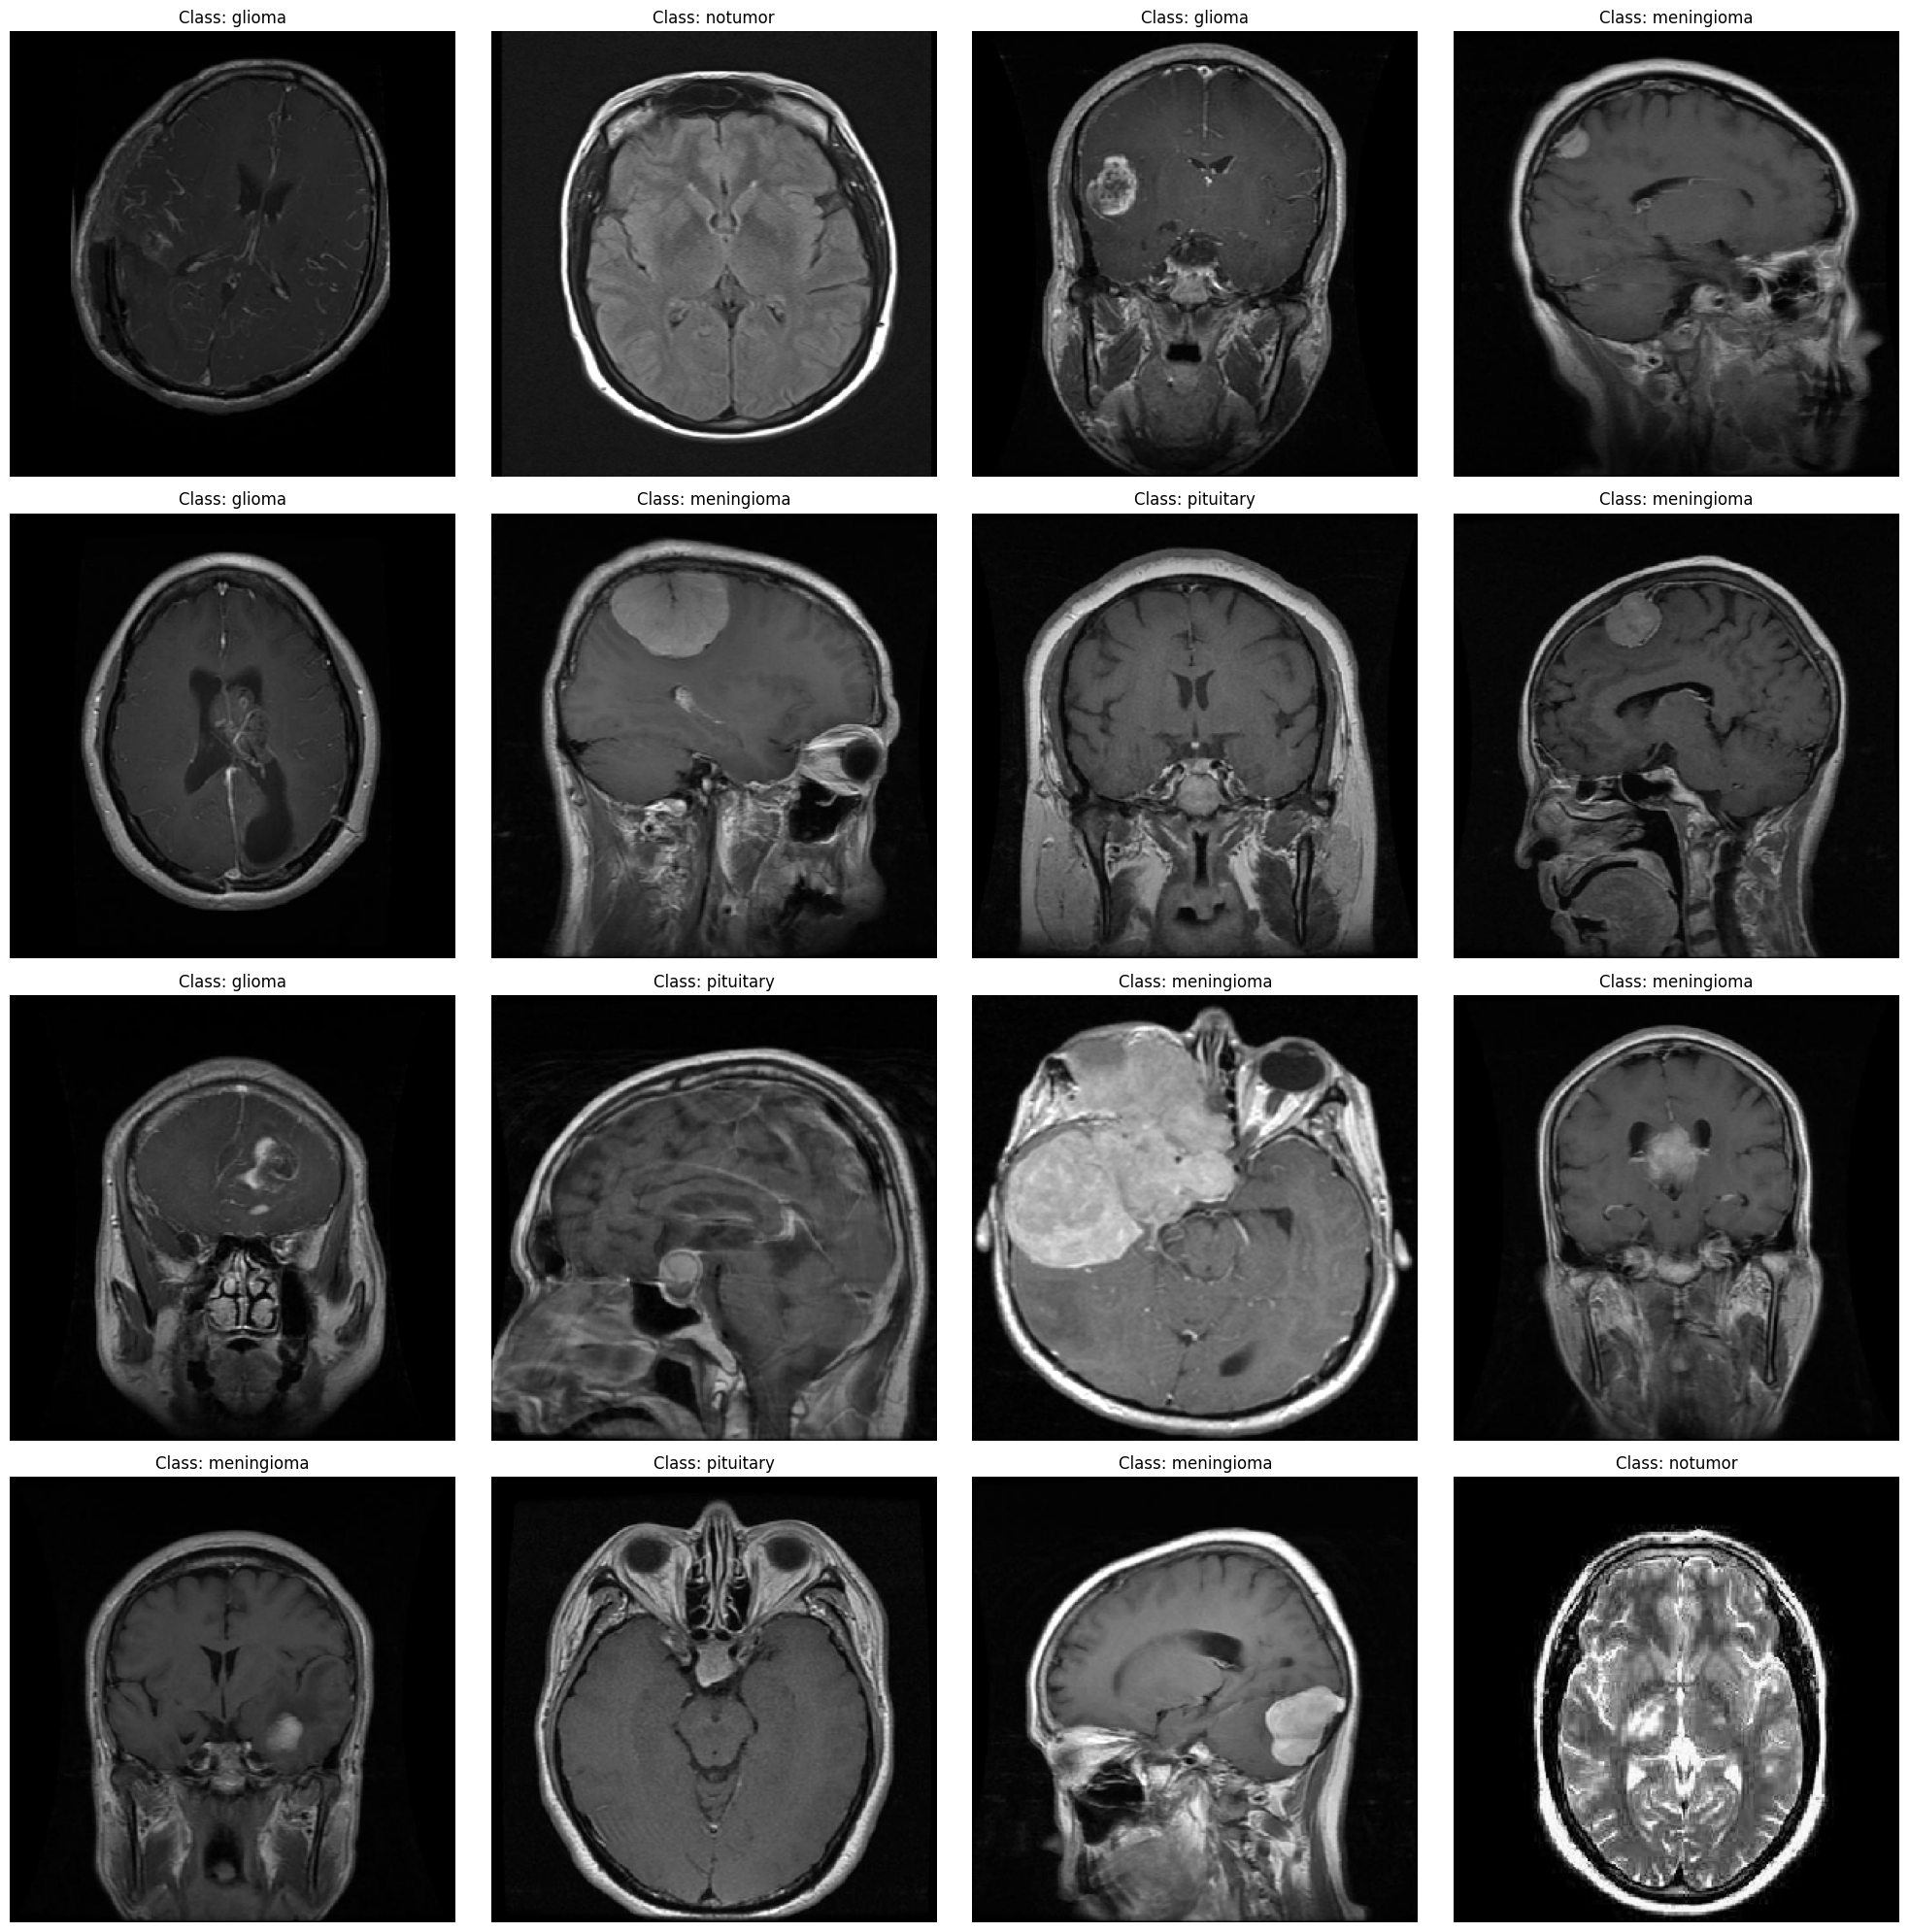

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16) :
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  clas_indices = list(tr_gen.class_indices.values())

  index_position = clas_indices.index(class_index)
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling='max')

model = Sequential([base_model,
                    Flatten(),
                    Dropout(rate=0.3),
                    Dense(128, activation='relu'),
                    Dropout(rate=0.25),
                    Dense(4, activation='softmax')
                    ])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

# Training the model

In [ ]:
hist = model.fit(tr_gen,
          epochs=10,
          validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.7739 - loss: 0.6228 - precision: 0.8331 - recall: 0.6972 - val_accuracy: 0.9725 - val_loss: 0.0768 - val_precision: 0.9755 - val_recall: 0.9710
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 836ms/step - accuracy: 0.9831 - loss: 0.0603 - precision: 0.9846 - recall: 0.9803 - val_accuracy: 0.9786 - val_loss: 0.0750 - val_precision: 0.9801 - val_recall: 0.9771
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 199s 821ms/step - accuracy: 0.9924 - loss: 0.0225 - precision: 0.9932 - recall: 0.9919 - val_accuracy: 0.9618 - val_loss: 0.1365 - val_precision: 0.9648 - val_recall: 0.9618
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 848ms/step - accuracy: 0.9930 - loss: 0.0222 - precision: 0.9930 - recall: 0.9929 - val_accuracy: 0.9939 - val_loss: 0.0237 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 856ms/step - accuracy: 0.9965 - loss: 0.0117 - precision: 0.9965 - recall: 0.9965 - val_accuracy: 0.9924 - val_lo

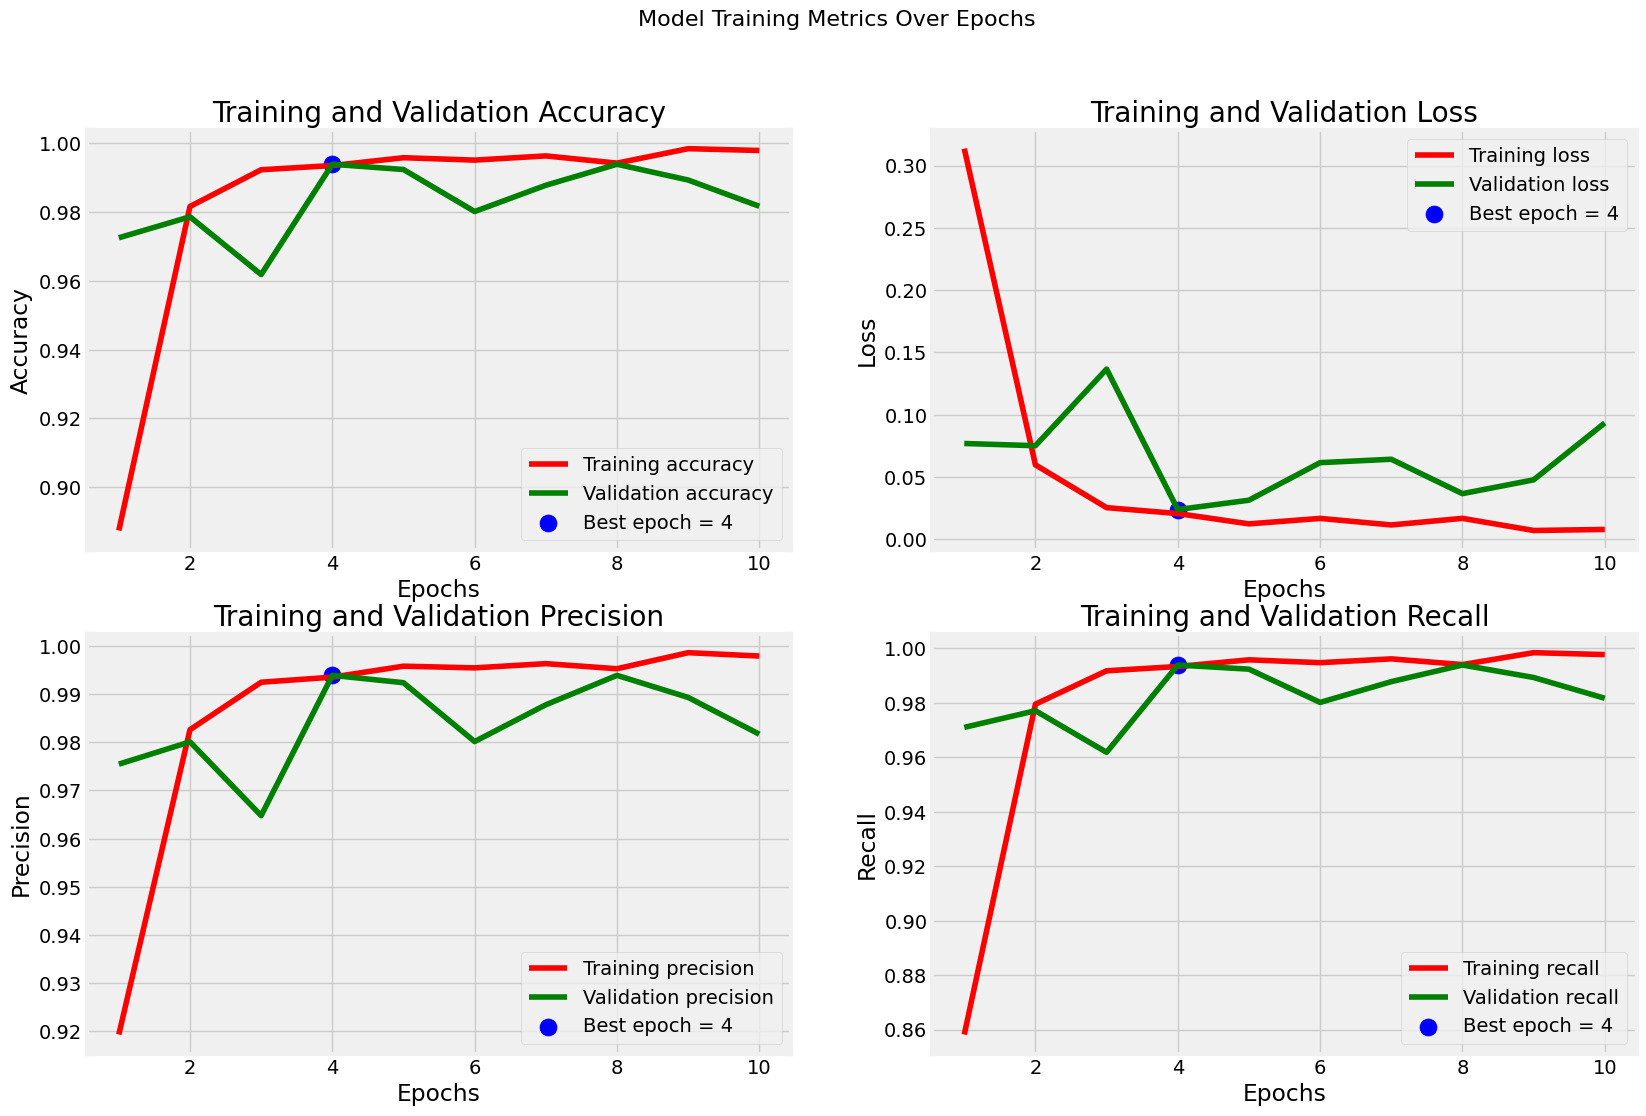

In [ ]:
# Get training and validation metrics from history
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m =="loss" :
    idx = np.argmin(val_metrics[m])
  else :
    idx = np.argmax(val_metrics[m])
  best_values[m] = val_metrics[m][idx]
  best_epochs[m] = idx +1

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use("fivethirtyeight")

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)
  plt.plot(epochs, tr_metrics[metric], 'r', label=f"Training {metric}")
  plt.plot(epochs, val_metrics[metric], 'g', label=f"Validation {metric}")
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f"Best epoch = {best_epochs[metric]}")
  plt.title(f"Training and Validation {metric.title()}")
  plt.xlabel("Epochs")
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)
plt.suptitle("Model Training Metrics Over Epochs", fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 260ms/step - accuracy: 0.9893 - loss: 0.0473 - precision: 0.9893 - recall: 0.9887
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9810 - loss: 0.0727 - precision: 0.9810 - recall: 0.9810


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.9719 - loss: 0.1203 - precision: 0.9719 - recall: 0.9718
Training Accuracy: 98.84%
Training Loss: 0.0447


Validation Accuracy: 98.02%
Validation Loss: 0.0945


Test Accuracy: 97.56%
Test Loss: 0.1107


21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 309ms/step


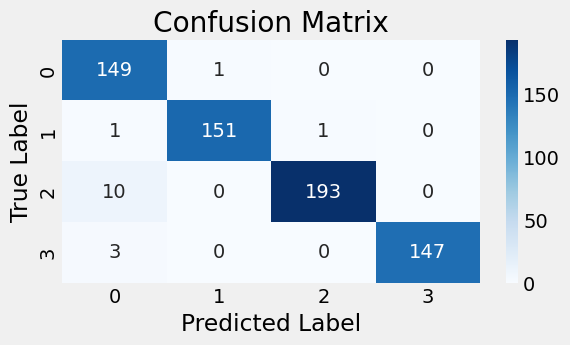

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Display, the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")


In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
batch_size = 16
img_size = (224,224)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    dataframe=tr_df,
    x_col = 'path',
    y_col='class',
    batch_size=batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col = 'path',
    y_col='class',
    batch_size=batch_size,
    target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col = 'path',
    y_col='class',
    batch_size=batch_size,
    target_size=img_size, shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras import regularizers

In [ ]:
# Create Sequential model
cnn_model = Sequential()

# Convolutional Layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers:
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 168s 399ms/step - accuracy: 0.5906 - loss: 2.0590 - precision: 0.6876 - recall: 0.4229 - val_accuracy: 0.7634 - val_loss: 0.8847 - val_precision: 0.7849 - val_recall: 0.7298
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 139s 288ms/step - accuracy: 0.7972 - loss: 0.7165 - precision: 0.8263 - recall: 0.7684 - val_accuracy: 0.8198 - val_loss: 0.6705 - val_precision: 0.8476 - val_recall: 0.7557
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 289ms/step - accuracy: 0.8595 - loss: 0.5378 - precision: 0.8773 - recall: 0.8415 - val_accuracy: 0.8397 - val_loss: 0.5745 - val_precision: 0.8477 - val_recall: 0.8244
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 293ms/step - accuracy: 0.8899 - loss: 0.4371 - precision: 0.8988 - recall: 0.8778 - val_accuracy: 0.8763 - val_loss: 0.4428 - val_precision: 0.8800 - val_recall: 0.8733
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 294ms/step - accuracy: 0.9256 - loss: 0.3616 - precision: 0.9318 - recall: 0.9190 - val_accuracy: 0.9069 - val

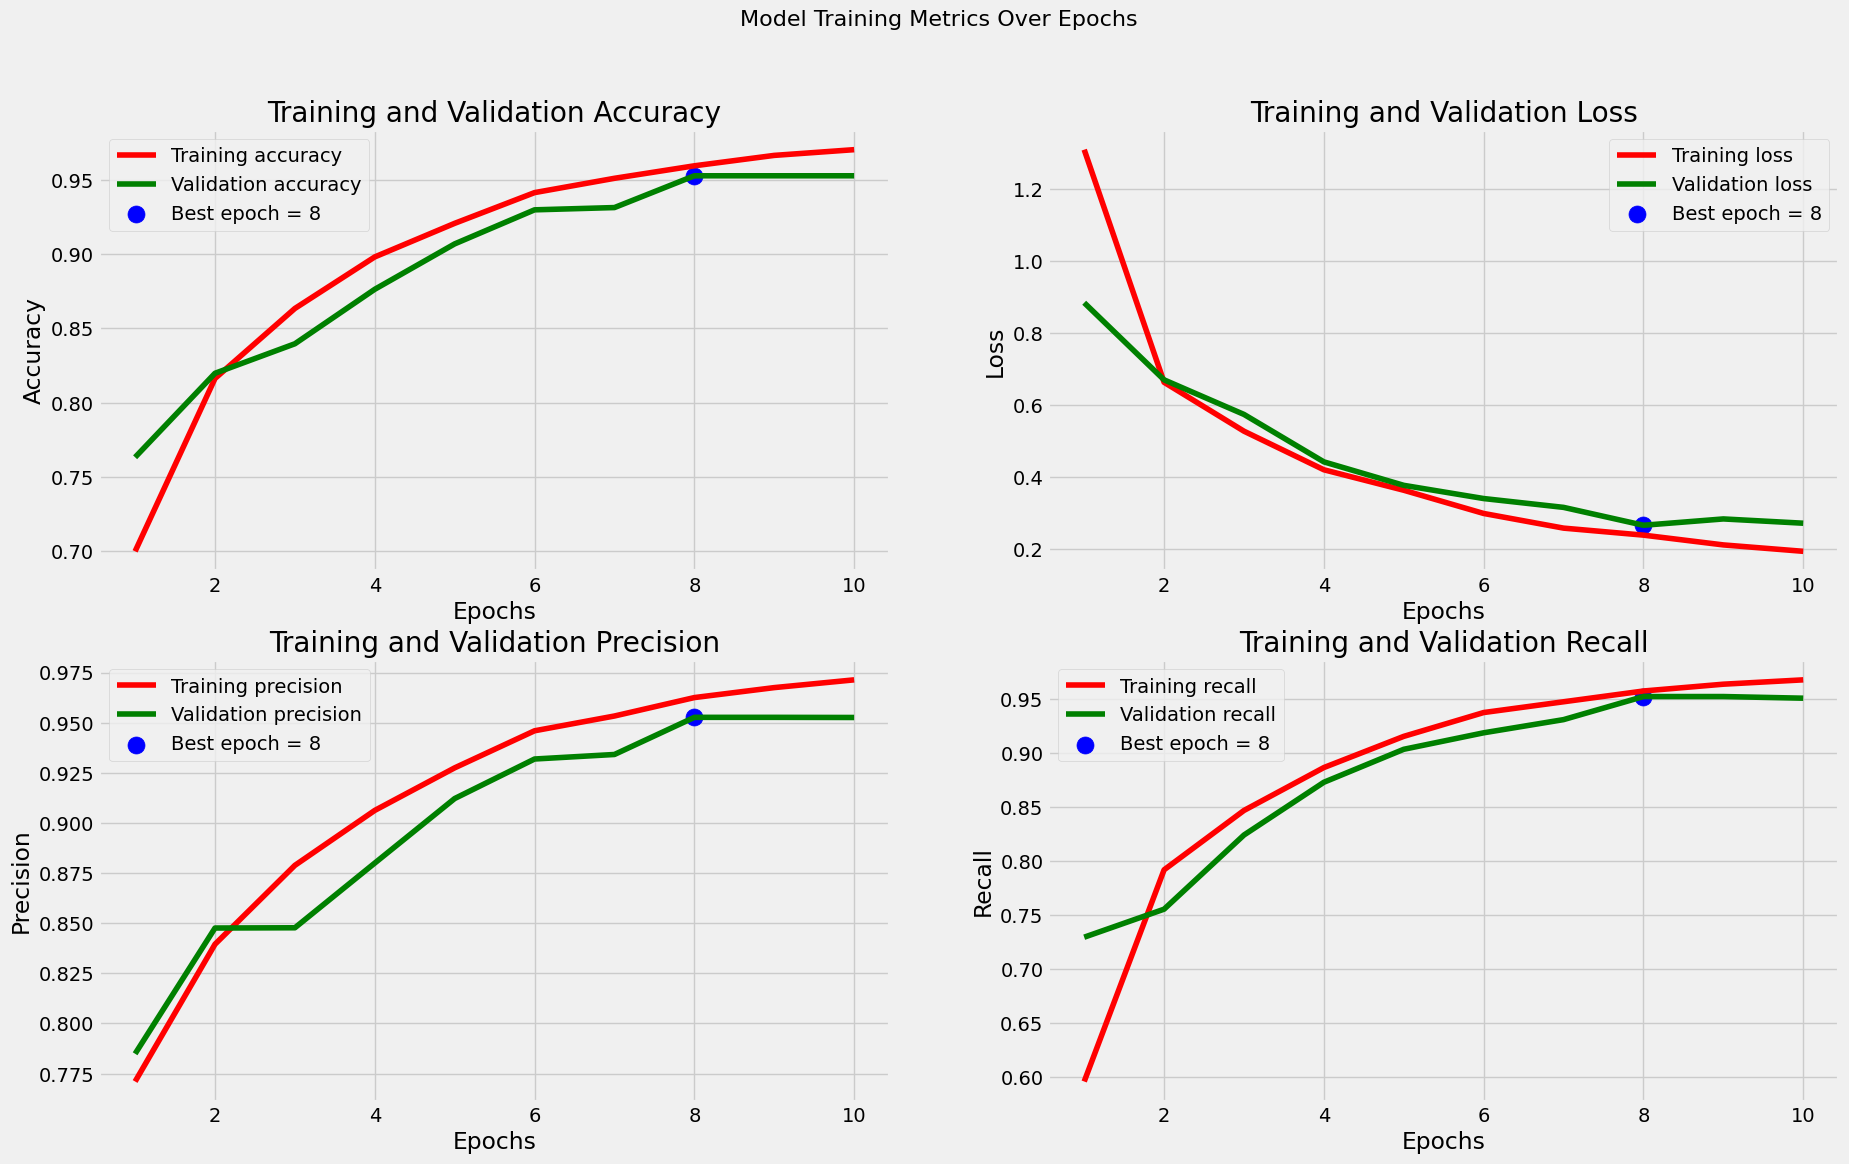

In [ ]:
# Get training and validation metrics from history
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f"val_{m}"] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m =="loss" :
    idx = np.argmin(val_metrics[m])
  else :
    idx = np.argmax(val_metrics[m])
  best_values[m] = val_metrics[m][idx]
  best_epochs[m] = idx +1

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use("fivethirtyeight")

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)
  plt.plot(epochs, tr_metrics[metric], 'r', label=f"Training {metric}")
  plt.plot(epochs, val_metrics[metric], 'g', label=f"Validation {metric}")
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f"Best epoch = {best_epochs[metric]}")
  plt.title(f"Training and Validation {metric.title()}")
  plt.xlabel("Epochs")
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)
plt.suptitle("Model Training Metrics Over Epochs", fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9915 - loss: 0.1498 - precision: 0.9915 - recall: 0.9913
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9458 - loss: 0.2965 - precision: 0.9457 - recall: 0.9440
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9531 - loss: 0.1806 - precision: 0.9531 - recall: 0.9531 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9689 - loss: 0.2131 - precision: 0.9689 - recall: 0.9678
Training Accuracy: 99.05%
Training Loss: 0.1473


Validation Accuracy: 96.03%
Validation Loss: 0.2751


Test Accuracy: 96.65%
Test Loss: 0.2062


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


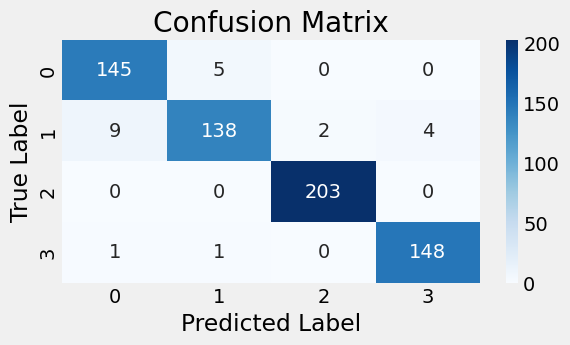

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Display, the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       150
           1       0.96      0.90      0.93       153
           2       0.99      1.00      1.00       203
           3       0.97      0.99      0.98       150

    accuracy                           0.97       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
cnn_model.save_weights("cnn_model.weights.h5")

# Streamlit App



In [1]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [20]:
from threading import Thread
import os
from pyngrok import ngrok
from google.colab import userdata

In [21]:
ngrok_token = userdata.get('NGROK_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [22]:
def run_streamlit() :
  os.system("streamlit run /content/app.py  --server.port 8501")

In [17]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import PIL.Image
import os
from dotenv import load_dotenv
import google.generativeai as genai
load_dotenv()
output_dir = "saliency_maps"
os.makedirs(output_dir, exist_ok=True)
from google.colab import userdata


genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))


def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.
    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' in your explanation.
    - Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
    """

    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-2.0-flash-exp")
    response = model.generate_content([prompt, img])

    return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    #Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    #Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    #Apply mask to gradients
    gradients = gradients * mask

    #Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
      f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img




def load_xception_model(model_path) :
  img_shape = (299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling='max')
  model = Sequential([base_model,
                    Flatten(),
                    Dropout(rate=0.3),
                    Dense(128, activation='relu'),
                    Dropout(rate=0.25),
                    Dense(4, activation='softmax')
                    ])
  model.build((None,) + img_shape)

  model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])
  model.load_weights(model_path)
  return model

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")
uploaded_file = st.file_uploader("Choose an image...",type=["jpg","jpeg","png"])

if uploaded_file is not None :
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )
  if selected_model=="Transfer Learning - Xception" :
    model = load_xception_model("/content/xception_model.weights.h5")
    img_size = (299,299)
  else :
    model = load_model("/content/cnn_model.weights.h5")
    img_size = (224,224)

  labels = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]) :
    st.write(f"{label}; {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_column_width=True)


  st.write("## Classification Results")
  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
    f"""
    <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
        <div style="display: flex; justify-content: space-between; align-items: center;">
            <div style="flex: 1; text-align: center;">
                <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">{result}</p>
            </div>
            <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
            <div style="flex: 1; text-align: center;">
                <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">{prediction[0][class_index]:.4f}</p>
            </div>
        </div>
    </div>
    """,
    unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar chart
  fig = go.Figure(go.Bar(
    x=sorted_probabilities,
    y=sorted_labels,
    orientation='h',
    marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
    title='Probabilities for each class',
    xaxis_title='Probability',
    yaxis_title='Class',
    height=400,
    width=600,
    yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4f}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  # Display the Plotly chart
  st.plotly_chart(fig)


  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write('## Explanation')
  st.write(explanation)

Overwriting app.py


In [23]:
thread = Thread(target=run_streamlit)
thread.start()

In [24]:
public_url = ngrok.connect(addr="8501", proto="http")
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://0099-34-91-70-41.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
%%writefile .env
GOOGLE_API_KEY =**********



Overwriting .env
